Initial setup

In [1]:
%run "Common setup.ipynb"

C:\programs\miniconda3\envs\uasa-trends\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
C:\programs\miniconda3\envs\uasa-trends\lib\site-packages\wosis\query.py:49: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  wos_config = yaml.load(config)


In [2]:
RC = mk.RecordCollection("{}/rest_filtered_corpora.txt".format(TMP_DIR))

Searching for active subspace methods, plotting keyword and publication trend

In [3]:
active = wosis.keyword_matches(RC, ['active subspace', 'activity scores'], threshold=95.0)

In [4]:
all_active = active.combine_recs()

In [5]:
act_df = wosis.rc_to_df(all_active)
act_df.to_csv('{}/active_subspaces_papers.csv'.format(DATA_DIR))

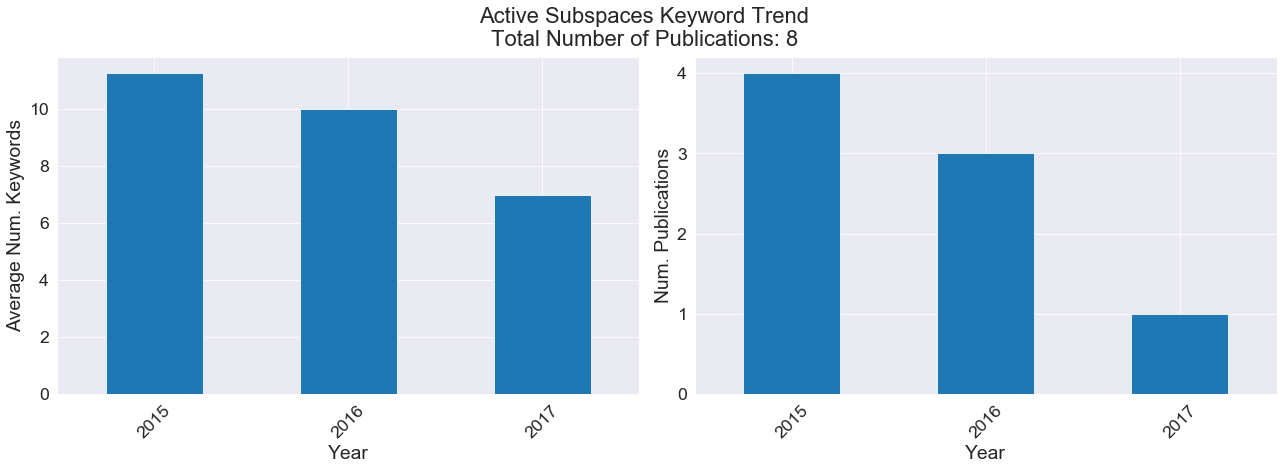

In [6]:
wos_plot.plot_kw_trend(all_active, title='Active Subspaces Keyword Trend', save_plot_fn='{}/active_kw_trend.png'.format(FIG_DIR))

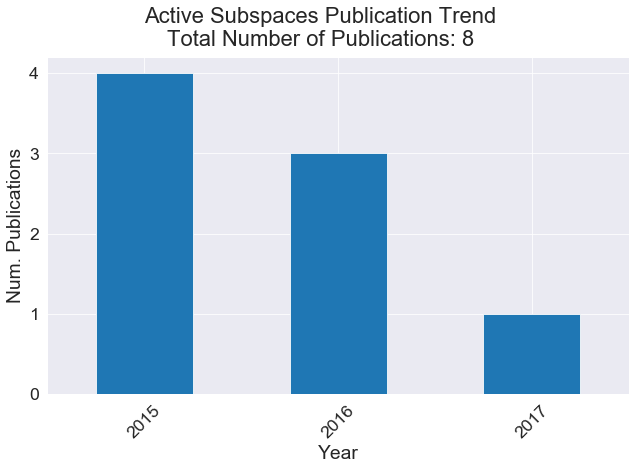

In [7]:
wos_plot.plot_pub_trend(all_active, title='Active Subspaces Publication Trend', 
                        save_plot_fn='{}/active_pub_trend.png'.format(FIG_DIR))

<hr> Topic trend (active subspaces)

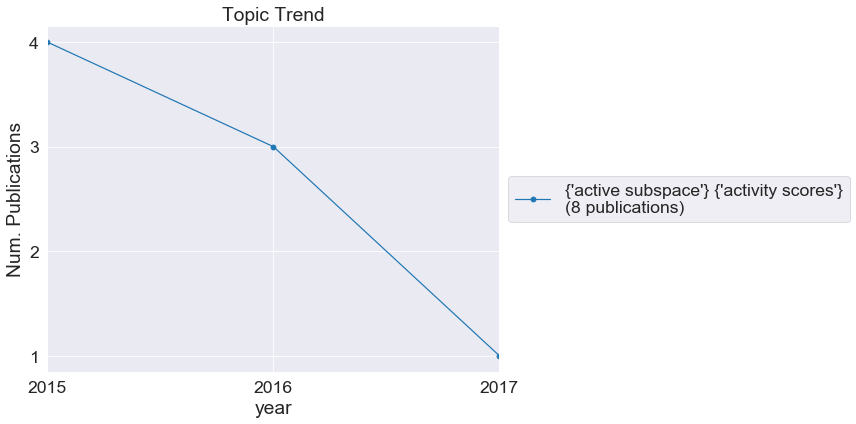

In [8]:
wos_plot.plot_topic_trend([all_active], save_plot_fn='{}/active_topic_trend.png'.format(FIG_DIR))

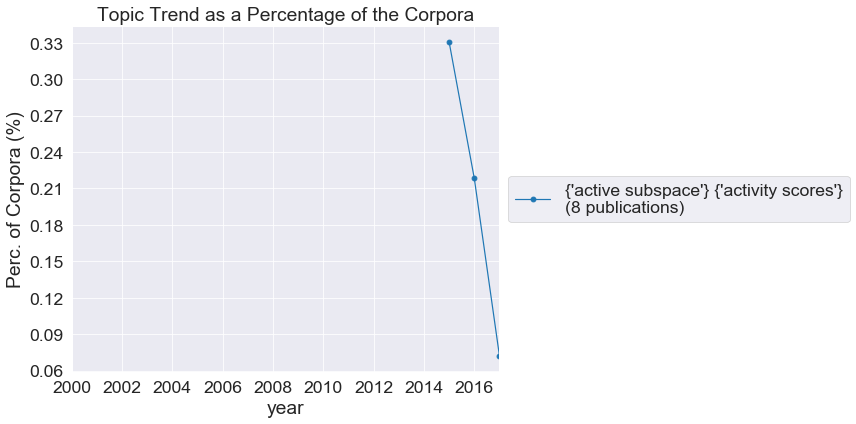

In [9]:
wos_plot.plot_topic_trend([all_active], total_rc=RC, title='Topic Trend as a Percentage of the Corpora', 
                          save_plot_fn='{}/active_topic_trend_percentage.png'.format(FIG_DIR))

In [10]:
active_citations = wosis.get_num_citations(all_active, WOS_CONFIG)

Authenticated (SID: 6CdsvKWVodBGX826dQc)


In [11]:
as_avg_citations = wosis.calc_average_citations(active_citations)

as_avg_citations.loc[:, ~as_avg_citations.columns.isin(HIDE_COLUMNS)].head()

,year,title,copyright,AU,SO,citations,Avg. Citations
0,2015,Exploiting active subspaces to quantify uncert...,(C) 2015 Elsevier Inc. All rights reserved.,"Constantine, PG|Emory, M|Larsson, J|Iaccarino, G",JOURNAL OF COMPUTATIONAL PHYSICS,24,8.00
1,2015,Active subspaces for sensitivity analysis and ...,Elsevier Ltd. All rights reserved.,"Jefferson, JL|Gilbert, JM|Constantine, PG|Maxw...",COMPUTERS & GEOSCIENCES,16,5.33
2,2016,Gaussian processes with built-in dimensionalit...,(C) 2016 Elsevier Inc. All rights reserved.,"Tripathy, R|Bilionis, I|Gonzalez, M",JOURNAL OF COMPUTATIONAL PHYSICS,15,7.50
3,2016,Stability analysis of thermo-acoustic nonlinea...,(C) 2016 Elsevier Inc. All rights reserved.,"Magri, L|Bauerheim, M|Nicoud, F|Juniper, MP",JOURNAL OF COMPUTATIONAL PHYSICS,13,6.50
4,2015,Discovering an active subspace in a single-dio...,,"Constantine, PG|Zaharatos, B|Campanelli, M",STATISTICAL ANALYSIS AND DATA MINING,9,3.00


<hr>
Searching for variogram methods, plotting keyword and publication trend

In [12]:
var = wosis.keyword_matches(RC, ['variogram sensitivity', 'variogram analysis', 'analysis with variogram', 
                                 'analysis variogram', 'variogram-based'], threshold=100.0)

In [13]:
all_var = var.combine_recs()

In [14]:
var_df = wosis.rc_to_df(all_var)
var_df.to_csv('{}/variogram_papers.csv'.format(DATA_DIR))

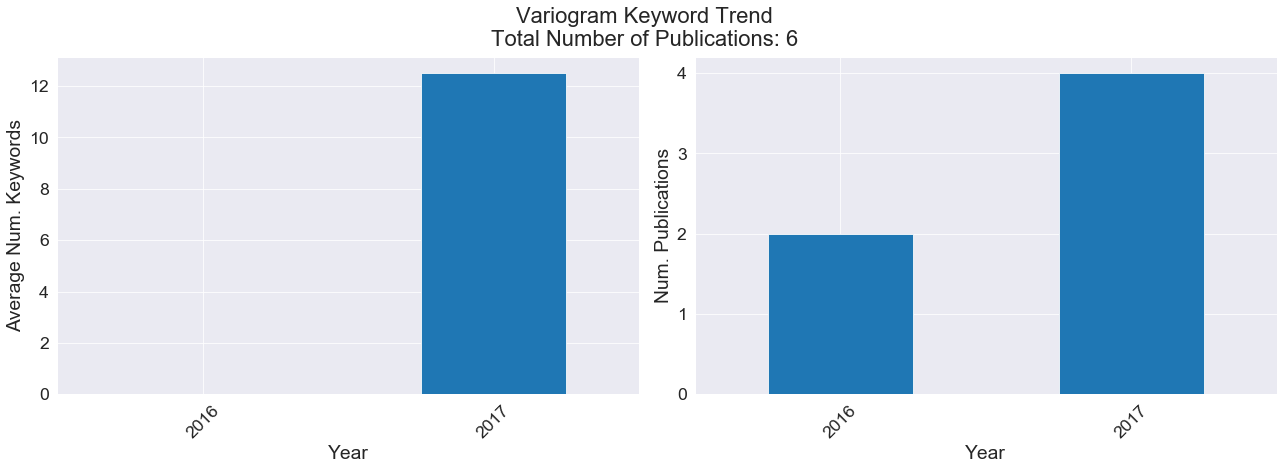

In [15]:
wos_plot.plot_kw_trend(all_var, title='Variogram Keyword Trend', save_plot_fn='{}/var_kw_trend.png'.format(FIG_DIR))

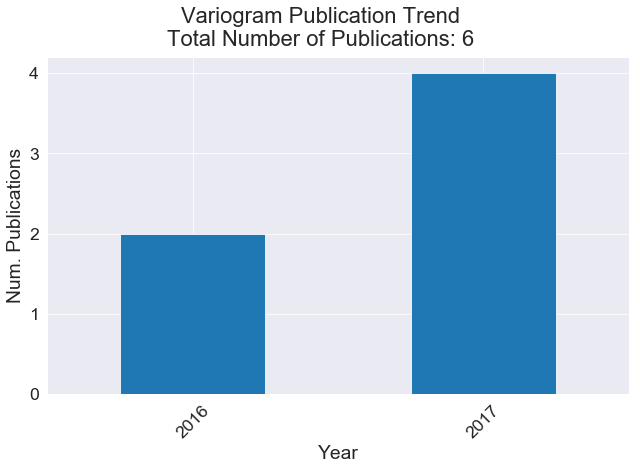

In [16]:
wos_plot.plot_pub_trend(all_var, title='Variogram Publication Trend', save_plot_fn='{}/var_pub_trend.png'.format(FIG_DIR))

<hr> Topic trend (variogram methods)

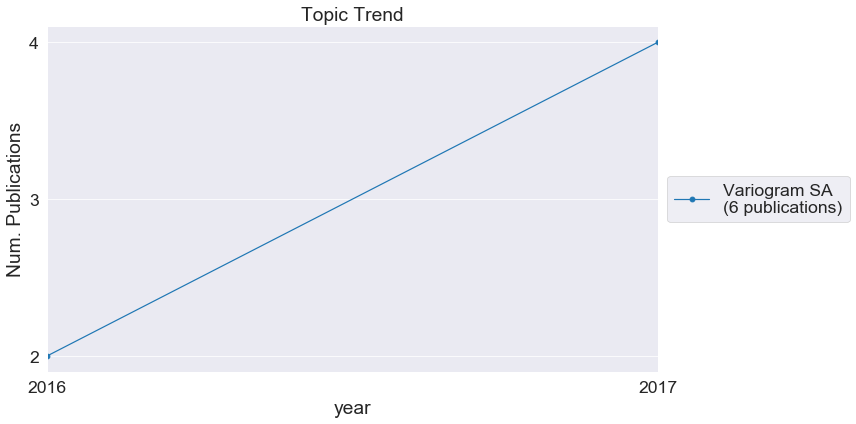

In [17]:
all_var.name='Variogram SA'
wos_plot.plot_topic_trend([all_var], save_plot_fn='{}/var_topic_trend.png'.format(FIG_DIR))

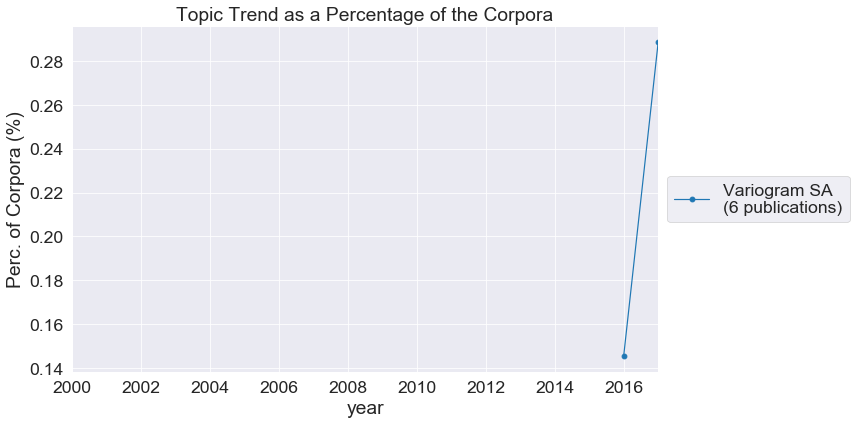

In [18]:
wos_plot.plot_topic_trend([all_var], total_rc=RC, title='Topic Trend as a Percentage of the Corpora', 
                          save_plot_fn='{}/var_topic_trend_percentage.png'.format(FIG_DIR))

In [19]:
var_citations = wosis.get_num_citations(all_var, WOS_CONFIG)

Authenticated (SID: 6EFgQ6TS95h4TKl8N2D)


In [20]:
var_citations.loc[:, ~var_citations.columns.isin(HIDE_COLUMNS)].head()

,year,title,copyright,AU,SO,citations
0,2016,"A new framework for comprehensive, robust, and...",,"Razavi, S|Gupta, HV",WATER RESOURCES RESEARCH,28
1,2016,"A new framework for comprehensive, robust, and...",,"Razavi, S|Gupta, HV",WATER RESOURCES RESEARCH,23
2,2017,Enhanced identification of a hydrologic model ...,,"Yassin, F|Razavi, S|Wheater, H|Sapriza-Azuri, ...",HYDROLOGICAL PROCESSES,9
3,2017,Insights into sensitivity analysis of Earth an...,Elsevier Ltd. All rights reserved.,"Haghnegahdar, A|Razavi, S",ENVIRONMENTAL MODELLING & SOFTWARE,8
4,2017,Multicriteria sensitivity analysis as a diagno...,,"Haghnegahdar, A|Razavi, S|Yassin, F|Wheater, H",HYDROLOGICAL PROCESSES,7


In [21]:
var_since_published = wosis.calc_average_citations(var_citations)
var_since_published.loc[:, ~var_since_published.columns.isin(HIDE_COLUMNS)].head()

,year,title,copyright,AU,SO,citations,Avg. Citations
0,2016,"A new framework for comprehensive, robust, and...",,"Razavi, S|Gupta, HV",WATER RESOURCES RESEARCH,28,14.0
1,2016,"A new framework for comprehensive, robust, and...",,"Razavi, S|Gupta, HV",WATER RESOURCES RESEARCH,23,11.5
2,2017,Enhanced identification of a hydrologic model ...,,"Yassin, F|Razavi, S|Wheater, H|Sapriza-Azuri, ...",HYDROLOGICAL PROCESSES,9,9.0
3,2017,Insights into sensitivity analysis of Earth an...,Elsevier Ltd. All rights reserved.,"Haghnegahdar, A|Razavi, S",ENVIRONMENTAL MODELLING & SOFTWARE,8,8.0
4,2017,Multicriteria sensitivity analysis as a diagno...,,"Haghnegahdar, A|Razavi, S|Yassin, F|Wheater, H",HYDROLOGICAL PROCESSES,7,7.0


<hr>
HDMR

In [22]:
hdmr = wosis.keyword_matches(RC, ['hdmr', 'high dimensional model representation'], threshold=95.0)

In [23]:
all_hdmr = hdmr.combine_recs()

In [24]:
hdmr_df = wosis.rc_to_df(all_hdmr)
hdmr_df.to_csv('{}/hdmr_papers.csv'.format(DATA_DIR))

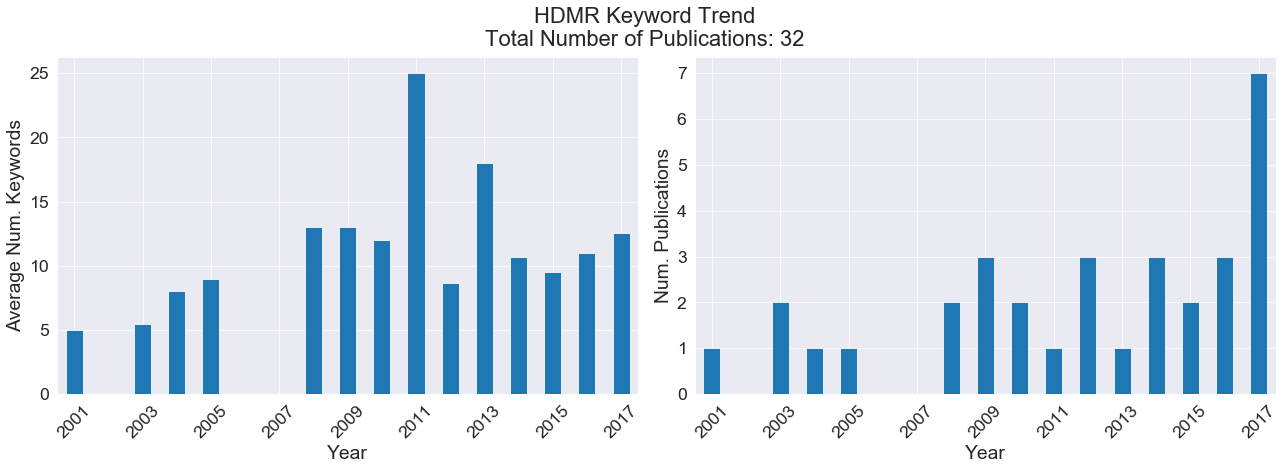

In [25]:
wos_plot.plot_kw_trend(all_hdmr, title='HDMR Keyword Trend', save_plot_fn='{}/hdmr_kw_trend.png'.format(FIG_DIR))

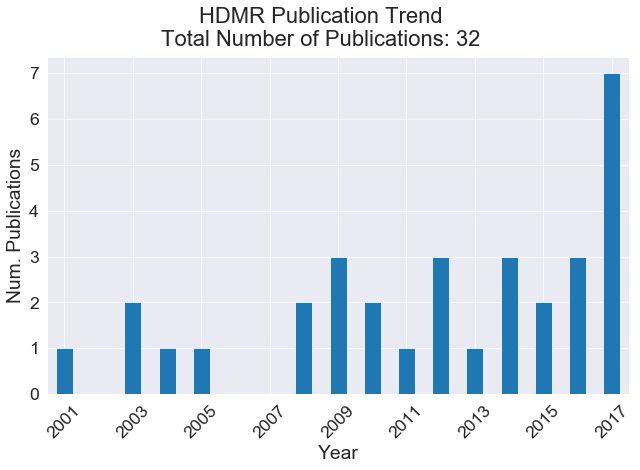

In [26]:
wos_plot.plot_pub_trend(all_hdmr, title='HDMR Publication Trend', 
                        save_plot_fn='{}/hdmr_pub_trend.png'.format(FIG_DIR))

<hr> Topic trend (active subspaces)

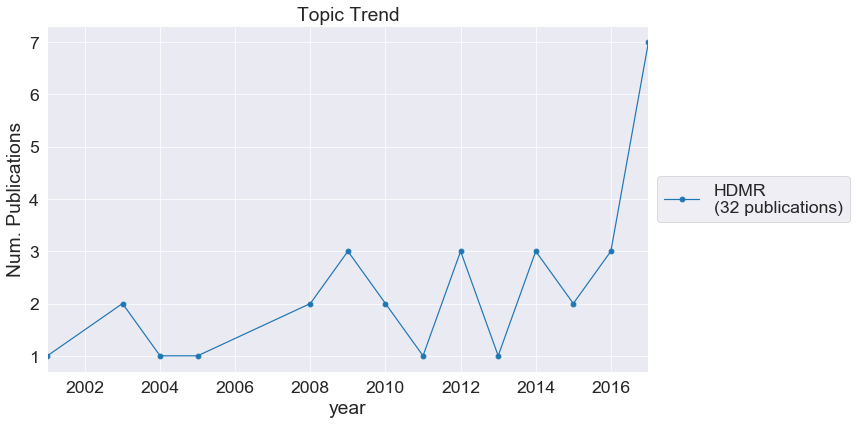

In [27]:
all_hdmr.name = 'HDMR'
wos_plot.plot_topic_trend([all_hdmr], save_plot_fn='{}/hdmr_topic_trend.png'.format(FIG_DIR))

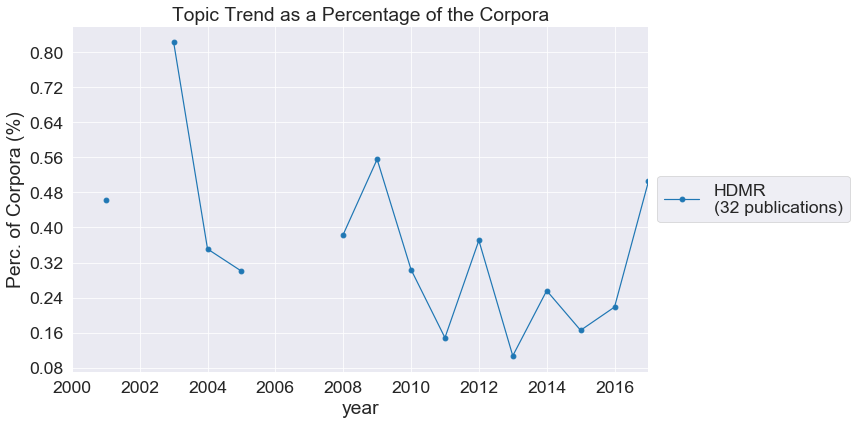

In [28]:
wos_plot.plot_topic_trend([all_hdmr], total_rc=RC, title='Topic Trend as a Percentage of the Corpora', 
                          save_plot_fn='{}/hdmr_topic_trend_percentage.png'.format(FIG_DIR))

In [29]:
hdmr_citations = wosis.get_num_citations(all_hdmr, WOS_CONFIG)

Authenticated (SID: 6EJ3CYBfemxKiSXurvH)


In [30]:
hdmr_since_published = wosis.calc_average_citations(hdmr_citations)
hdmr_since_published.loc[:, ~hdmr_since_published.columns.isin(HIDE_COLUMNS)].head()

,year,title,copyright,AU,SO,citations,Avg. Citations
0,2001,Efficient implementation of high dimensional m...,,"Alis, OF|Rabitz, H",JOURNAL OF MATHEMATICAL CHEMISTRY,159,9.35
1,2009,GUI-HDMR - A software tool for global sensitiv...,Elsevier Ltd. All rights reserved.,"Ziehn, T|Tomlin, AS",ENVIRONMENTAL MODELLING & SOFTWARE,122,13.56
2,2010,An adaptive high-dimensional stochastic model ...,,"Ma, X|Zabaras, N",JOURNAL OF COMPUTATIONAL PHYSICS,105,13.12
3,2012,General formulation of HDMR component function...,,"Li, GY|Rabitz, H",JOURNAL OF MATHEMATICAL CHEMISTRY,71,11.83
4,2008,Global sensitivity analysis of a 3-dimensional...,Elsevier Ltd. All rights reserved.,"Ziehn, T|Tomlin, AS",ATMOSPHERIC ENVIRONMENT,33,3.30
